importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


Bad key "text.kerning_factor" on line 4 in
C:\Users\brigu\Anaconda3\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


importing the dataset

In [2]:
dataset = pd.read_csv('.\dataset\Bengaluru_House_Data.csv')
print(dataset.head(10))
print(dataset.shape)

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   
5  Super built-up  Area  Ready To Move                Whitefield      2 BHK   
6  Super built-up  Area         18-May          Old Airport Road      4 BHK   
7  Super built-up  Area  Ready To Move              Rajaji Nagar      4 BHK   
8  Super built-up  Area  Ready To Move              Marathahalli      3 BHK   
9            Plot  Area  Ready To Move              Gandhi Bazar  6 Bedroom   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0

Data preprocessing<br>
 getting the count of area type in the dataset

In [3]:
print(dataset.groupby('area_type')['area_type'].agg('count'))

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64


 droping unnecessary columns

In [4]:
dataset.drop(['area_type','society','availability','balcony'], axis='columns', inplace=True)
print(dataset.shape)

(13320, 5)


 data cleaning

In [5]:
print(dataset.isnull().sum())
dataset.dropna(inplace=True)
print(dataset.shape)

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64
(13246, 5)


# data engineering

In [6]:
print(dataset['size'].unique())
dataset['bhk'] = dataset['size'].apply(lambda x: float(x.split(' ')[0]))

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


# exploring 'total_sqft' column

In [7]:
print(dataset['total_sqft'].unique())

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


## defining a function to check whether the value is float or not

In [8]:
def is_float(x):
    try:
        float(x)
    except :
        return False
    return True

In [9]:
print(dataset[~dataset['total_sqft'].apply(is_float)].head(10))

               location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000  4.0
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000  4.0
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005  2.0
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490  2.0
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800  2.0
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500  1.0
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770  2.0
648             Arekere  9 Bedroom       4125Perch   9.0  265.000  9.0
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130  2.0
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000  4.0


## defining a function to convert the range of column values to a single value

In [10]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
#### testing the function
print(convert_sqft_to_num('290'))
print(convert_sqft_to_num('2100 - 2850'))
print(convert_sqft_to_num('4.46Sq. Meter'))

290.0
2475.0
None


## applying this function to the dataset

In [11]:
dataset['total_sqft'] = dataset['total_sqft'].apply(convert_sqft_to_num)
print(dataset['total_sqft'].head(10))
print(dataset.loc[30])

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
5    1170.0
6    2732.0
7    3300.0
8    1310.0
9    1020.0
Name: total_sqft, dtype: float64
location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object


 feature engineering

In [12]:
print(dataset.head(10))

                   location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07  2.0
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00  4.0
2               Uttarahalli      3 BHK      1440.0   2.0   62.00  3.0
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00  3.0
4                  Kothanur      2 BHK      1200.0   2.0   51.00  2.0
5                Whitefield      2 BHK      1170.0   2.0   38.00  2.0
6          Old Airport Road      4 BHK      2732.0   4.0  204.00  4.0
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00  4.0
8              Marathahalli      3 BHK      1310.0   3.0   63.25  3.0
9              Gandhi Bazar  6 Bedroom      1020.0   6.0  370.00  6.0


# creating new colomn 'price_per_sqft' as we know<br>
# in real estate market, price per sqft matters alot. 

In [13]:
dataset['price_per_sqft'] = dataset['price']*100000/dataset['total_sqft']
print(dataset['price_per_sqft'])

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13246, dtype: float64


# exploring 'location' column

In [14]:
print(len(dataset['location'].unique()))

1304


In [15]:
dataset['location'] = dataset['location'].apply(lambda x: x.strip())

In [16]:
location_stats = dataset.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats[0:10])

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
Yelahanka                210
Uttarahalli              186
Hebbal                   176
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64


## creating 'location_stats' to get the location with total count or occurance <br>
## occurance, and 'location_stats_less_than_10' to get the location with <= 10 <br>
## occurance

In [17]:
print(len(location_stats[location_stats <= 10]))
location_stats_less_than_10 = location_stats[location_stats <= 10]
print(location_stats_less_than_10)

1052
location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64


## redefining the 'location' column as 'other' value where location count<br>
## is <= 10

In [18]:
dataset['location'] = dataset['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
print(dataset['location'].head(10))
print(len(dataset['location'].unique()))

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
5                  Whitefield
6            Old Airport Road
7                Rajaji Nagar
8                Marathahalli
9                       other
Name: location, dtype: object
242


 Outlier detection and removal

# checking that 'total_sqft'/'bhk', if it's very less than there is some<br>
# anomaly and we have to remove these outliers

In [19]:
print(dataset[dataset['total_sqft'] / dataset['bhk'] < 300].sort_values(by='total_sqft').head(10))
print(dataset.shape)

                 location       size  total_sqft  bath  price  bhk  \
4086       Sarjapur  Road  4 Bedroom         1.0   4.0  120.0  4.0   
4972                other      7 BHK         5.0   7.0  115.0  7.0   
349                 other  3 Bedroom        11.0   3.0   74.0  3.0   
1020                other      1 BHK        15.0   1.0   30.0  1.0   
1122                other  5 Bedroom        24.0   2.0  150.0  5.0   
5970          Mysore Road  1 Bedroom        45.0   1.0   23.0  1.0   
11558          Whitefield  4 Bedroom        60.0   4.0  218.0  4.0   
13216               other      1 BHK       250.0   2.0   40.0  1.0   
119           Hennur Road  2 Bedroom       276.0   3.0   23.0  2.0   
10526  Yelahanka New Town      1 BHK       284.0   1.0    8.0  1.0   

       price_per_sqft  
4086     1.200000e+07  
4972     2.300000e+06  
349      6.727273e+05  
1020     2.000000e+05  
1122     6.250000e+05  
5970     5.111111e+04  
11558    3.633333e+05  
13216    1.600000e+04  
119      8.33

In [20]:
dataset = dataset[~(dataset['total_sqft'] / dataset['bhk'] < 300)]
print(dataset.shape)

(12502, 7)


# checking columns where 'price_per_sqft' is very low<br>
# where it should not be that low, so it's an anomaly and <br>
# we have to remove those rows

In [21]:
print(dataset['price_per_sqft'].describe())

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64


# function to remove these extreme cases of very high or low values<br>
# of 'price_per_sqft' based on std()

In [22]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (mean - std)) & (subdf['price_per_sqft'] <= (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [23]:
dataset = remove_pps_outliers(dataset)
print(dataset.shape)

(10241, 7)


# plotting graoh where we can visualize that properties with same location<br>
# and the price of 3 bhk properties with higher 'total_sqft' is less than <br>
# 2 bhk properties with lower 'total_sqft'

In [24]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], 
                bhk2['price'], 
                color='blue', 
                label='2 BHK', 
                s=50
                )
    plt.scatter(bhk3['total_sqft'], 
                bhk3['price'], 
                marker='+',
                color='green', 
                label='3 BHK', 
                s=50
                )
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

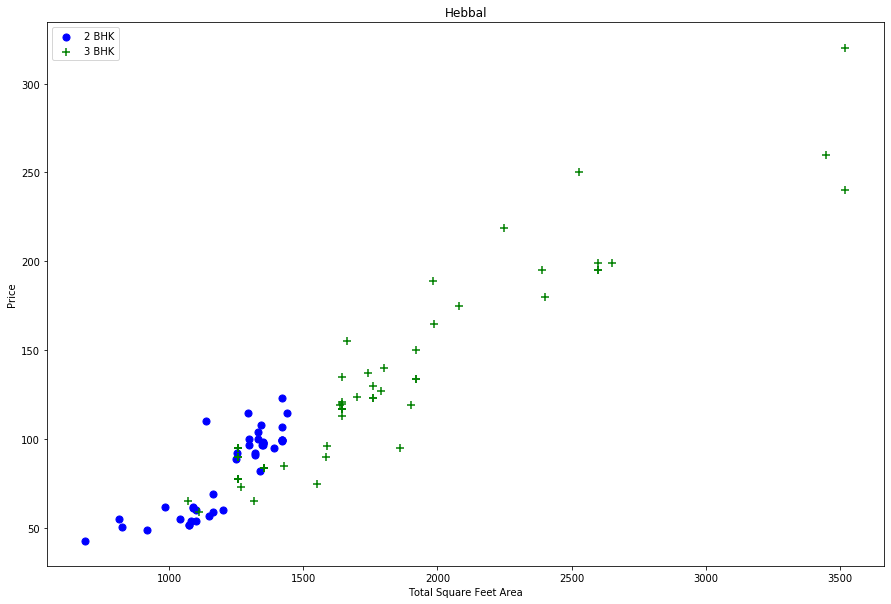

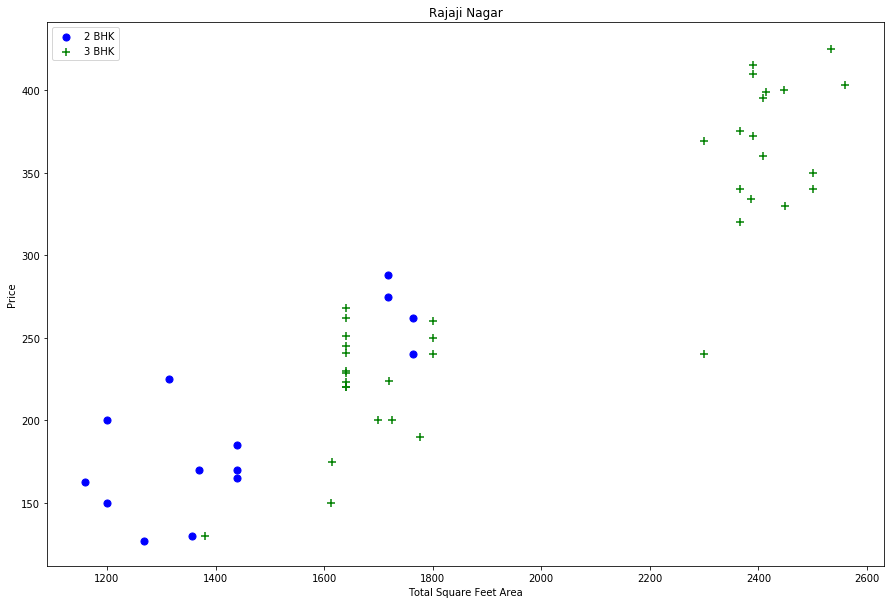

In [25]:
plot_scatter_chart(dataset,"Hebbal")
plot_scatter_chart(dataset,"Rajaji Nagar")

# defining a funcion where we can get the rows where 'bhk' & 'location'<br>
# is same but the property with less 'bhk' have more price than the property<br>
# which have more 'bhk'. So, it's also an anomalu and we have to remove these <br>
# properties

In [26]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                    'mean': np.mean(bhk_df['price_per_sqft']),
                    'std': np.std(bhk_df['price_per_sqft']),
                    'count': bhk_df.shape[0]
                }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
        
dataset = remove_bhk_outliers(dataset)
print(dataset.shape)
            
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], 
                bhk2['price'], 
                color='blue', 
                label='2 BHK', 
                s=50
                )
    plt.scatter(bhk3['total_sqft'], 
                bhk3['price'], 
                marker='+',
                color='green', 
                label='3 BHK', 
                s=50
                )
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

(7329, 7)


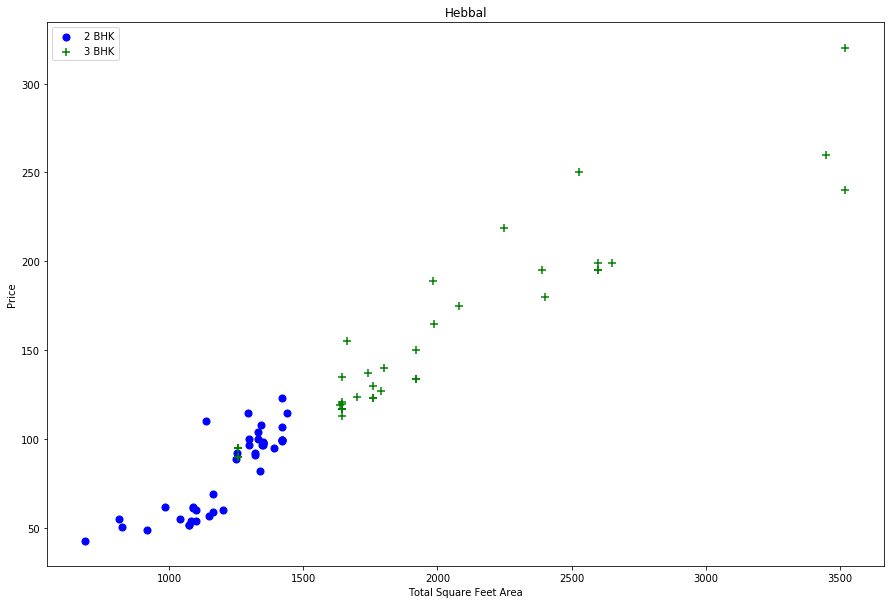

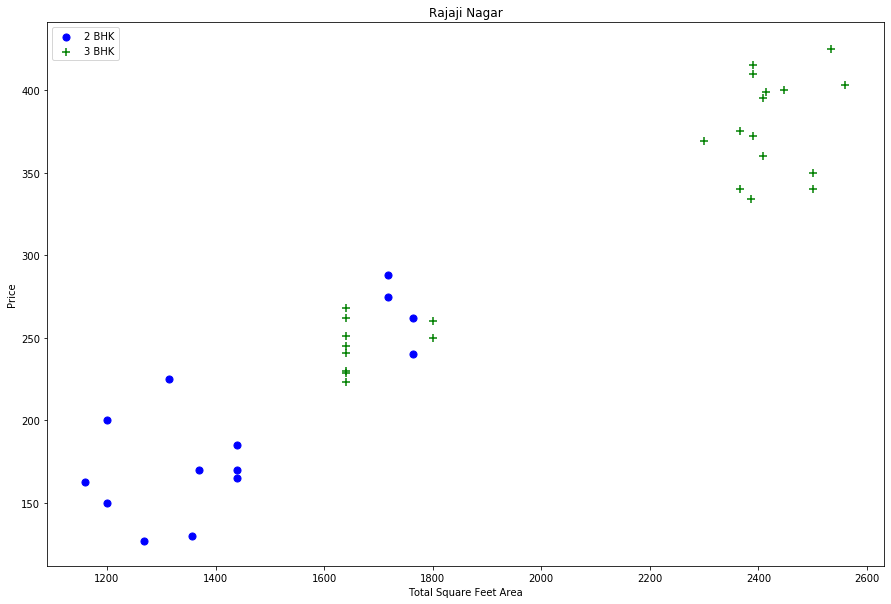

In [27]:
plot_scatter_chart(dataset,"Hebbal")
plot_scatter_chart(dataset,"Rajaji Nagar")

# histogram for properties per sqaure feet area

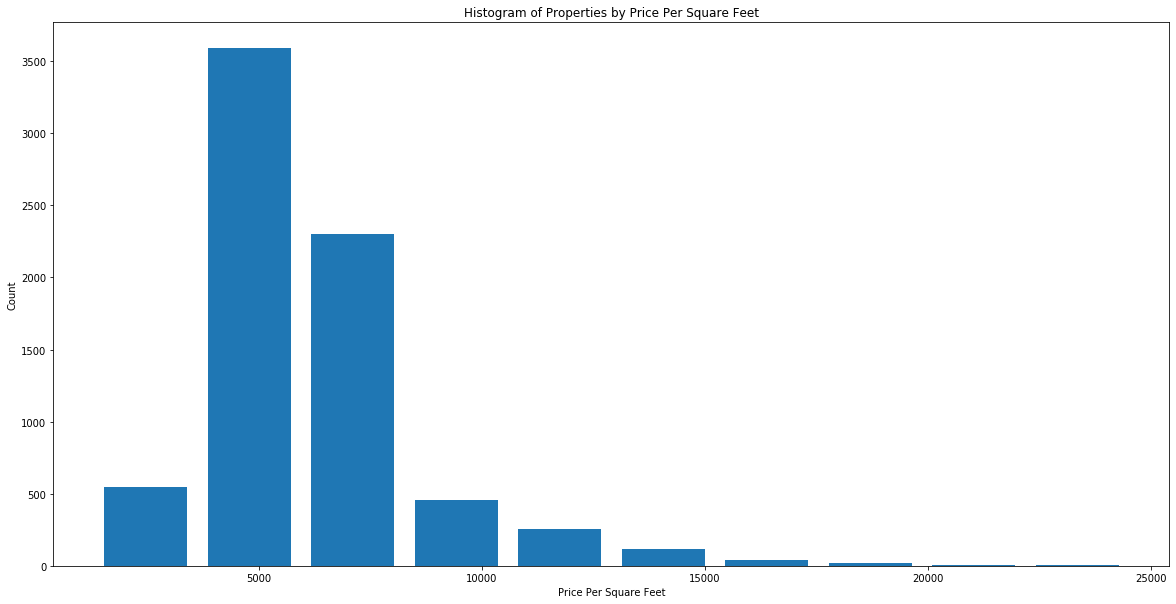

In [28]:
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(dataset['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.title('Histogram of Properties by Price Per Square Feet')
plt.show()

# exploring bathroom feature

In [29]:
print(dataset['bath'].unique())

[ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]


## having 10 bedrooms and bathroom > 10 is unusual<br>
## so, we will remove these anomalies

In [30]:
print(dataset[dataset['bath'] > 10])

            location    size  total_sqft  bath  price   bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0  10.0     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0  10.0     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0  16.0     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0  11.0     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0  13.0     5069.124424


## plotting histogram of bathroom 

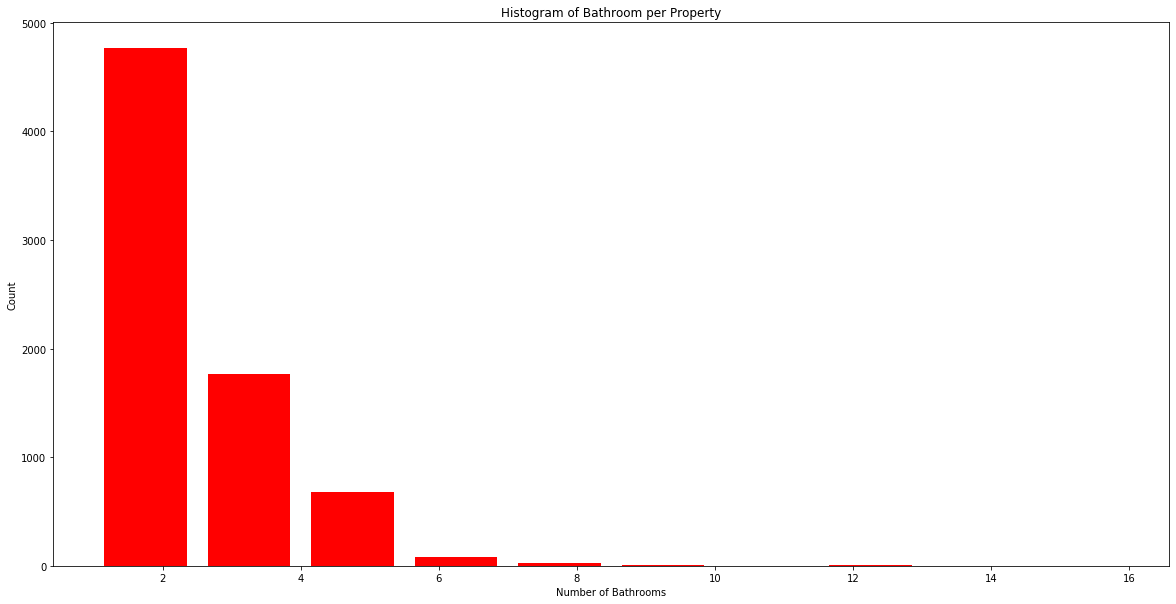

In [31]:
plt.hist(dataset['bath'], rwidth=0.8, color='red')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Histogram of Bathroom per Property')
plt.show()

In [32]:
print(dataset[dataset['bath'] > dataset['bhk'] + 2])
dataset = dataset[dataset['bath'] < dataset['bhk'] + 2]
print(dataset.shape)

           location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0  4.0     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0  4.0     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0  3.0     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0  6.0     8819.897689
(7251, 7)


# after removing outliers, dropping unwanted features

In [33]:
dataset.drop(['size','price_per_sqft'], axis='columns', inplace=True)
print(dataset.head())

              location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0  4.0
1  1st Block Jayanagar      1630.0   3.0  194.0  3.0
2  1st Block Jayanagar      1875.0   2.0  235.0  3.0
3  1st Block Jayanagar      1200.0   2.0  130.0  3.0
4  1st Block Jayanagar      1235.0   2.0  148.0  2.0


 one hot encoding the 'location' column

In [34]:
dummies = pd.get_dummies(dataset['location'])
print(dummies.head())

   1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   
3                    1                   0                          0   
4                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1               

In [35]:
dataset = pd.concat([dataset,dummies.drop('other', axis='columns')], axis='columns')
dataset.drop('location', axis=1, inplace=True)
print(dataset.head())
print(dataset.shape)

   total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0  4.0                    1                   0   
1      1630.0   3.0  194.0  3.0                    1                   0   
2      1875.0   2.0  235.0  3.0                    1                   0   
3      1200.0   2.0  130.0  3.0                    1                   0   
4      1235.0   2.0  148.0  2.0                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0

 distributing independent features in 'X' and dependent feature in 'y'

In [36]:
X = dataset.drop(['price'],axis= 'columns')
y = dataset['price']
print(X.shape)
print(y.shape)

(7251, 244)
(7251,)


 splitting the dataset into training set and test set

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

 training  the model

In [38]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.score(X_test,y_test))

0.8452277697874312


 k-fold cross validation

In [39]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
cross_val_score(regressor,X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

 grid search, hyper parameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [41]:
def find_best_model_using_gridsearch(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': { 'normalize': [True, False]}
            },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
                }
            },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
                }
            }
        }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],
                          config['params'],
                          cv=cv,
                          n_jobs=-1,
                          return_train_score=False
                          )
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
            })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_scores = find_best_model_using_gridsearch(X,y)
print(model_scores)

               model  best_score  \
0  linear_regression    0.818354   
1              lasso    0.687453   
2      decision_tree    0.722519   

                                         best_params  
0                                {'normalize': True}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  


# so after running grid search, linear regression model have the best score<br>
# so i will use linear regression model on the whole dataset

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 evaluating the model

In [43]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return regressor.predict([x])[0]

In [44]:
print(predict_price('1st Phase JP Nagar',1000,2,2))
print(predict_price('1st Phase JP Nagar',1000,3,3))
print(predict_price('Indira Nagar',1000,3,3))

85.83901256841601
87.76501220608625
181.59488997129654


saving the model

In [45]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(regressor,f)

exporting columns

In [46]:
import json
columns = {'data_columns': [col.lower() for col in X.columns]}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))